# Hybridized system for predicting gas production forecasting 

Using ANN and GA as prediction and optimization tools for the study

STEPS
1. data wrangling 

2. data exploration 

3. Training with ANN 
4. Optimization with GA
5. Working with Confusion matrix to check features and explore results 
6. retraining the data for better results 


# Objectives


- To predict gas production forecasting
- To optimize the prediction
- To extract features that are necessary to the prediction and optimization

# 1. Data wrangling and exploration


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import shutil
import pickle as pk
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

from keras import models
import keras as kr
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [2]:
gas_df = pd.read_csv(r"C:\Users\Alexa\OneDrive\Desktop\data repository\data gas.csv")
gas_df.head()
#data has already been normalised via maximum absolute scaling 

gas_vol  dry_oil_vol   water_vol  fline_press  fline_temp  \
0  1.132476      5.455950  -0.513847     1.836730    0.452848   
1  1.158132      5.311261  -0.596564     1.871802    0.191744   
2  1.159609      5.308917  -0.596564     1.941946   -0.243431   
3  1.164268      5.241335  -0.596564     1.836730    0.626918   
4  1.164756      5.126756  -0.555205     1.836730    0.626918   

   flowing_thp_prod  shut_in_thp  choke_size_prod  
0          2.831070    -0.266954        -1.048228  
1          2.866899    -0.266954        -1.059084  
2          2.837916    -0.266954        -1.061875  
3          2.858912    -0.266954        -1.074901  
4          2.789764    -0.266954        -1.071800

## checking the relationships in each cell
#### 1. define the parameters and corresponding values 
#### 2.the value counts in each cell
#### 3. the relationship between each cell and the gas production

In [3]:
#checking for columns 
gas_df.columns

Index(['gas_vol', 'dry_oil_vol ', 'water_vol', 'fline_press', 'fline_temp',
       'flowing_thp_prod', 'shut_in_thp', 'choke_size_prod'],
      dtype='object')

In [4]:
#column headers
for column_titles in gas_df.columns:
    print(column_titles)
    

gas_vol
dry_oil_vol 
water_vol
fline_press
fline_temp
flowing_thp_prod
shut_in_thp
choke_size_prod


In [5]:
#rename columns
gas_df.columns = ['gas_vol', 'dry_oil_vol', 'water_vol', 'fline_press', 'fline_temp',
       'flowing_thp_prod', 'shut_in_thp', 'choke_size_prod',
       ]
gas_df

gas_vol  dry_oil_vol  water_vol  fline_press  fline_temp  \
0      1.132476     5.455950  -0.513847     1.836730    0.452848   
1      1.158132     5.311261  -0.596564     1.871802    0.191744   
2      1.159609     5.308917  -0.596564     1.941946   -0.243431   
3      1.164268     5.241335  -0.596564     1.836730    0.626918   
4      1.164756     5.126756  -0.555205     1.836730    0.626918   
...         ...          ...        ...          ...         ...   
13582 -0.760719    -0.677559  -0.513847    -1.389887   -0.417501   
13583 -0.775192    -0.677513  -0.513847    -1.389887   -0.635088   
13584 -0.788706    -0.677595  -0.513847    -1.389887   -0.678606   
13585 -0.777146    -0.677476  -0.513847    -1.389887   -0.678606   
13586 -0.773216    -0.677522  -0.513847    -1.389887   -0.678606   

       flowing_thp_prod  shut_in_thp  choke_size_prod  
0              2.831070    -0.266954        -1.048228  
1              2.866899    -0.266954        -1.059084  
2              2.837916    -0.266954        -1.061875  
3              2.858912    -0.266954        -1.074901  
4              2.789764    -0.266954        -1.071800  
...                 ...          ...              ...  
13582         -0.765538    -0.266954         0.913775  
13583         -0.648466    -0.266954         0.911604  
13584         -0.708714    -0.266954         0.908192  
13585         -0.775351    -0.266954         0.908502  
13586         -0.631806    -0.266954         0.908192  

[13587 rows x 8 columns]

### column values


In [6]:
for column_titles in gas_df.columns:
    print(column_titles)

gas_vol
dry_oil_vol
water_vol
fline_press
fline_temp
flowing_thp_prod
shut_in_thp
choke_size_prod


## parametres 
dry_oil_vol = dov

water_vol = wv

fline_press= flp

fline_temp = flt

flowing_thp_prod = ftp

shut_in_thp = sit

choke_size_prod= csp

gas_vol = gv

In [7]:
# data exploration 1
gdata = gas_df.values
gdata

array([[ 1.13247635,  5.45594963, -0.51384693, ...,  2.83106987,
        -0.26695401, -1.04822847],
       [ 1.1581321 ,  5.31126145, -0.59656402, ...,  2.86689902,
        -0.26695401, -1.05908369],
       [ 1.15960912,  5.30891709, -0.59656402, ...,  2.83791621,
        -0.26695401, -1.06187503],
       ...,
       [-0.78870611, -0.67759536, -0.51384693, ..., -0.70871355,
        -0.26695401,  0.90819202],
       [-0.77714597, -0.67747584, -0.51384693, ..., -0.77535121,
        -0.26695401,  0.90850216],
       [-0.77321649, -0.67752181, -0.51384693, ..., -0.63180639,
        -0.26695401,  0.90819202]])

In [8]:
#get data types 
gas_df.dtypes

gas_vol             float64
dry_oil_vol         float64
water_vol           float64
fline_press         float64
fline_temp          float64
flowing_thp_prod    float64
shut_in_thp         float64
choke_size_prod     float64
dtype: object

In [9]:
train_df = pd.read_csv(r'C:\Users\Alexa\Total_cleaned_data1.csv')

train_df.head()

daily_date field_id  well_no  dry_oil_vol  gas_vol  water_vol  \
0  29/11/2006 00:00        N       34       38.018  225.200      7.425   
1  30/11/2006 00:00        N       34       24.847  163.024      4.308   
2  01/12/2006 00:00        N       34       48.053  356.974      9.579   
3  02/12/2006 00:00        N       34       65.053  390.122     11.000   
4  03/12/2006 00:00        N       34       65.253  411.773     11.000   

   fline_press  fline_temp  flowing_thp_prod  shut_in_thp  choke_size_prod  
0          0.0         0.0             28.14        65.90            57.01  
1          0.0         0.0             30.00        43.13            18.49  
2         27.0        44.0             42.90        73.32            41.53  
3         26.0        40.0             50.37         0.00            39.84  
4         26.0        45.0             27.69         0.00            88.90

In [10]:
train_df.describe()

well_no   dry_oil_vol       gas_vol     water_vol   fline_press  \
count  13587.000000  13587.000000  13587.000000  13587.000000  13587.000000   
mean      25.647678     74.400297    277.527534     33.848406     39.629612   
std        3.083657    108.771844    289.096956     48.357603     28.512839   
min       22.000000      0.000000      0.000000      0.000000      0.000000   
25%       22.000000      7.943000     77.195000      0.000000     17.000000   
50%       26.000000     26.282000    168.913000     10.000000     46.000000   
75%       27.000000     89.617000    353.079000     62.000000     64.000000   
max       34.000000    915.257000   1752.208000    490.000000    162.000000   

         fline_temp  flowing_thp_prod   shut_in_thp  choke_size_prod  
count  13587.000000      13587.000000  13587.000000     13587.000000  
mean      35.593869         50.255165      6.795291        58.667567  
std       22.979279         43.819065     25.454913        32.242557  
min        0.000000          0.000000      0.000000         0.010000  
25%       18.000000         25.705000      0.000000        20.120000  
50%       38.000000         37.810000      0.000000        70.360000  
75%       52.000000         68.570000      0.000000        88.900000  
max      387.000000        220.870000    288.580000        88.900000

In [11]:
gas_df.describe()

gas_vol   dry_oil_vol     water_vol   fline_press    fline_temp  \
count  1.358700e+04  1.358700e+04  1.358700e+04  1.358700e+04  1.358700e+04   
mean   2.929412e-11  3.827578e-11 -4.953325e-11 -7.855211e-11  6.644247e-11   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -9.599808e-01 -6.840033e-01 -6.999604e-01 -1.389887e+00 -1.548955e+00   
25%   -6.929597e-01 -6.109789e-01 -6.999604e-01 -7.936639e-01 -7.656406e-01   
50%   -3.757028e-01 -4.423782e-01 -4.931677e-01  2.234217e-01  1.047087e-01   
75%    2.613361e-01  1.398956e-01  5.821545e-01  8.547163e-01  7.139533e-01   
max    5.100989e+00  7.730463e+00  9.432883e+00  4.291764e+00  1.529230e+01   

       flowing_thp_prod   shut_in_thp  choke_size_prod  
count      1.358700e+04  1.358700e+04     1.358700e+04  
mean      -2.259028e-11  5.511976e-11    -1.718602e-10  
std        1.000000e+00  1.000000e+00     1.000000e+00  
min       -1.146879e+00 -2.669540e-01    -1.819259e+00  
25%       -5.602622e-01 -2.669540e-01    -1.195549e+00  
50%       -2.840126e-01 -2.669540e-01     3.626398e-01  
75%        4.179650e-01 -2.669540e-01     9.376562e-01  
max        3.893621e+00  1.106995e+01     9.376562e-01

# Data wrangling 

<AxesSubplot:ylabel='Frequency'>

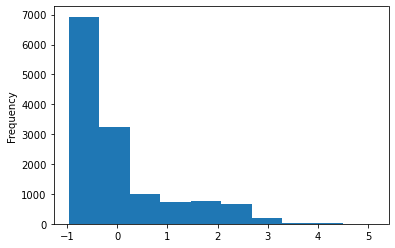

In [12]:
gas_df['gas_vol'].plot(kind='hist')

<AxesSubplot:xlabel='gas_vol', ylabel='choke_size_prod'>

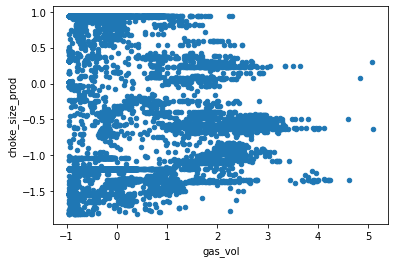

In [13]:
gas_df.plot('gas_vol', 'choke_size_prod', kind ='scatter')

<AxesSubplot:xlabel='gas_vol', ylabel='choke_size_prod'>

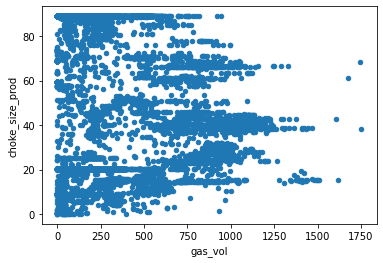

In [14]:
train_df.plot('gas_vol', 'choke_size_prod', kind ='scatter')

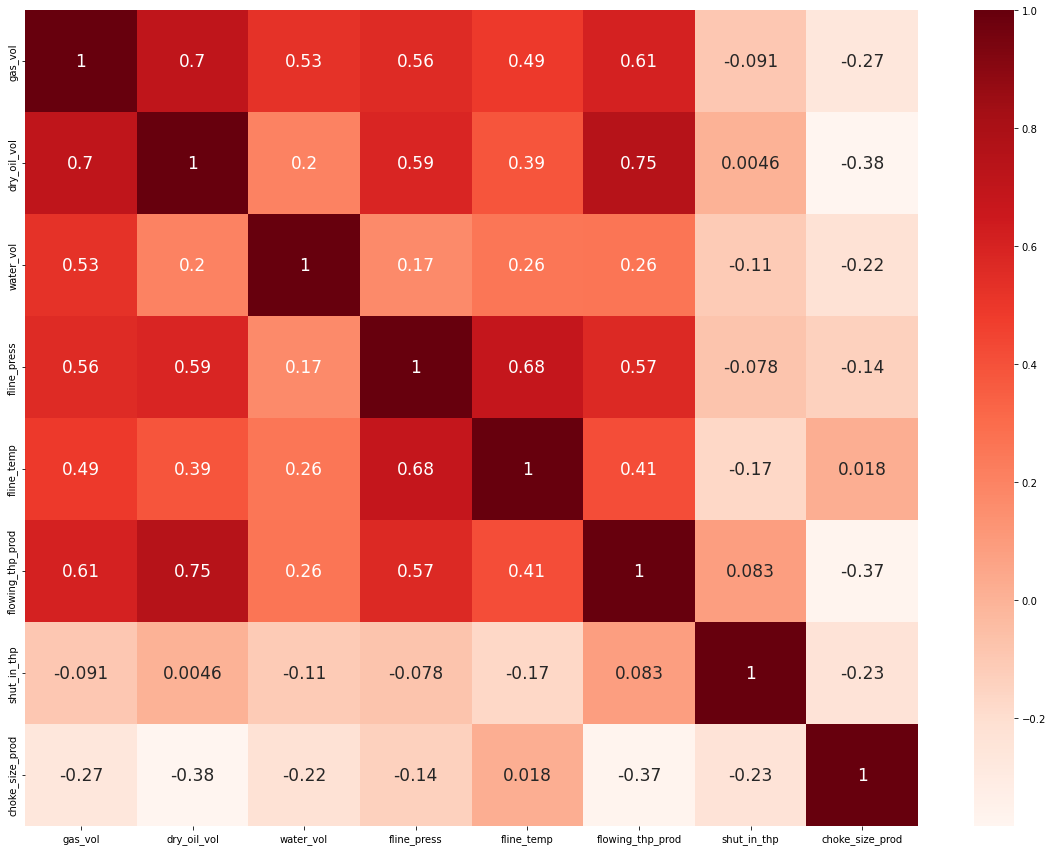

In [15]:
# make a correlation plot (heatmap)
#Correllation heatmap has explained the relationship between gas volume and other elements. 
#Features will be extracted accordingly to help with the prediction. 
#So far, values that are influential are >= 1
corr_mx = gas_df.corr()
f, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':17}, cmap='Reds')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

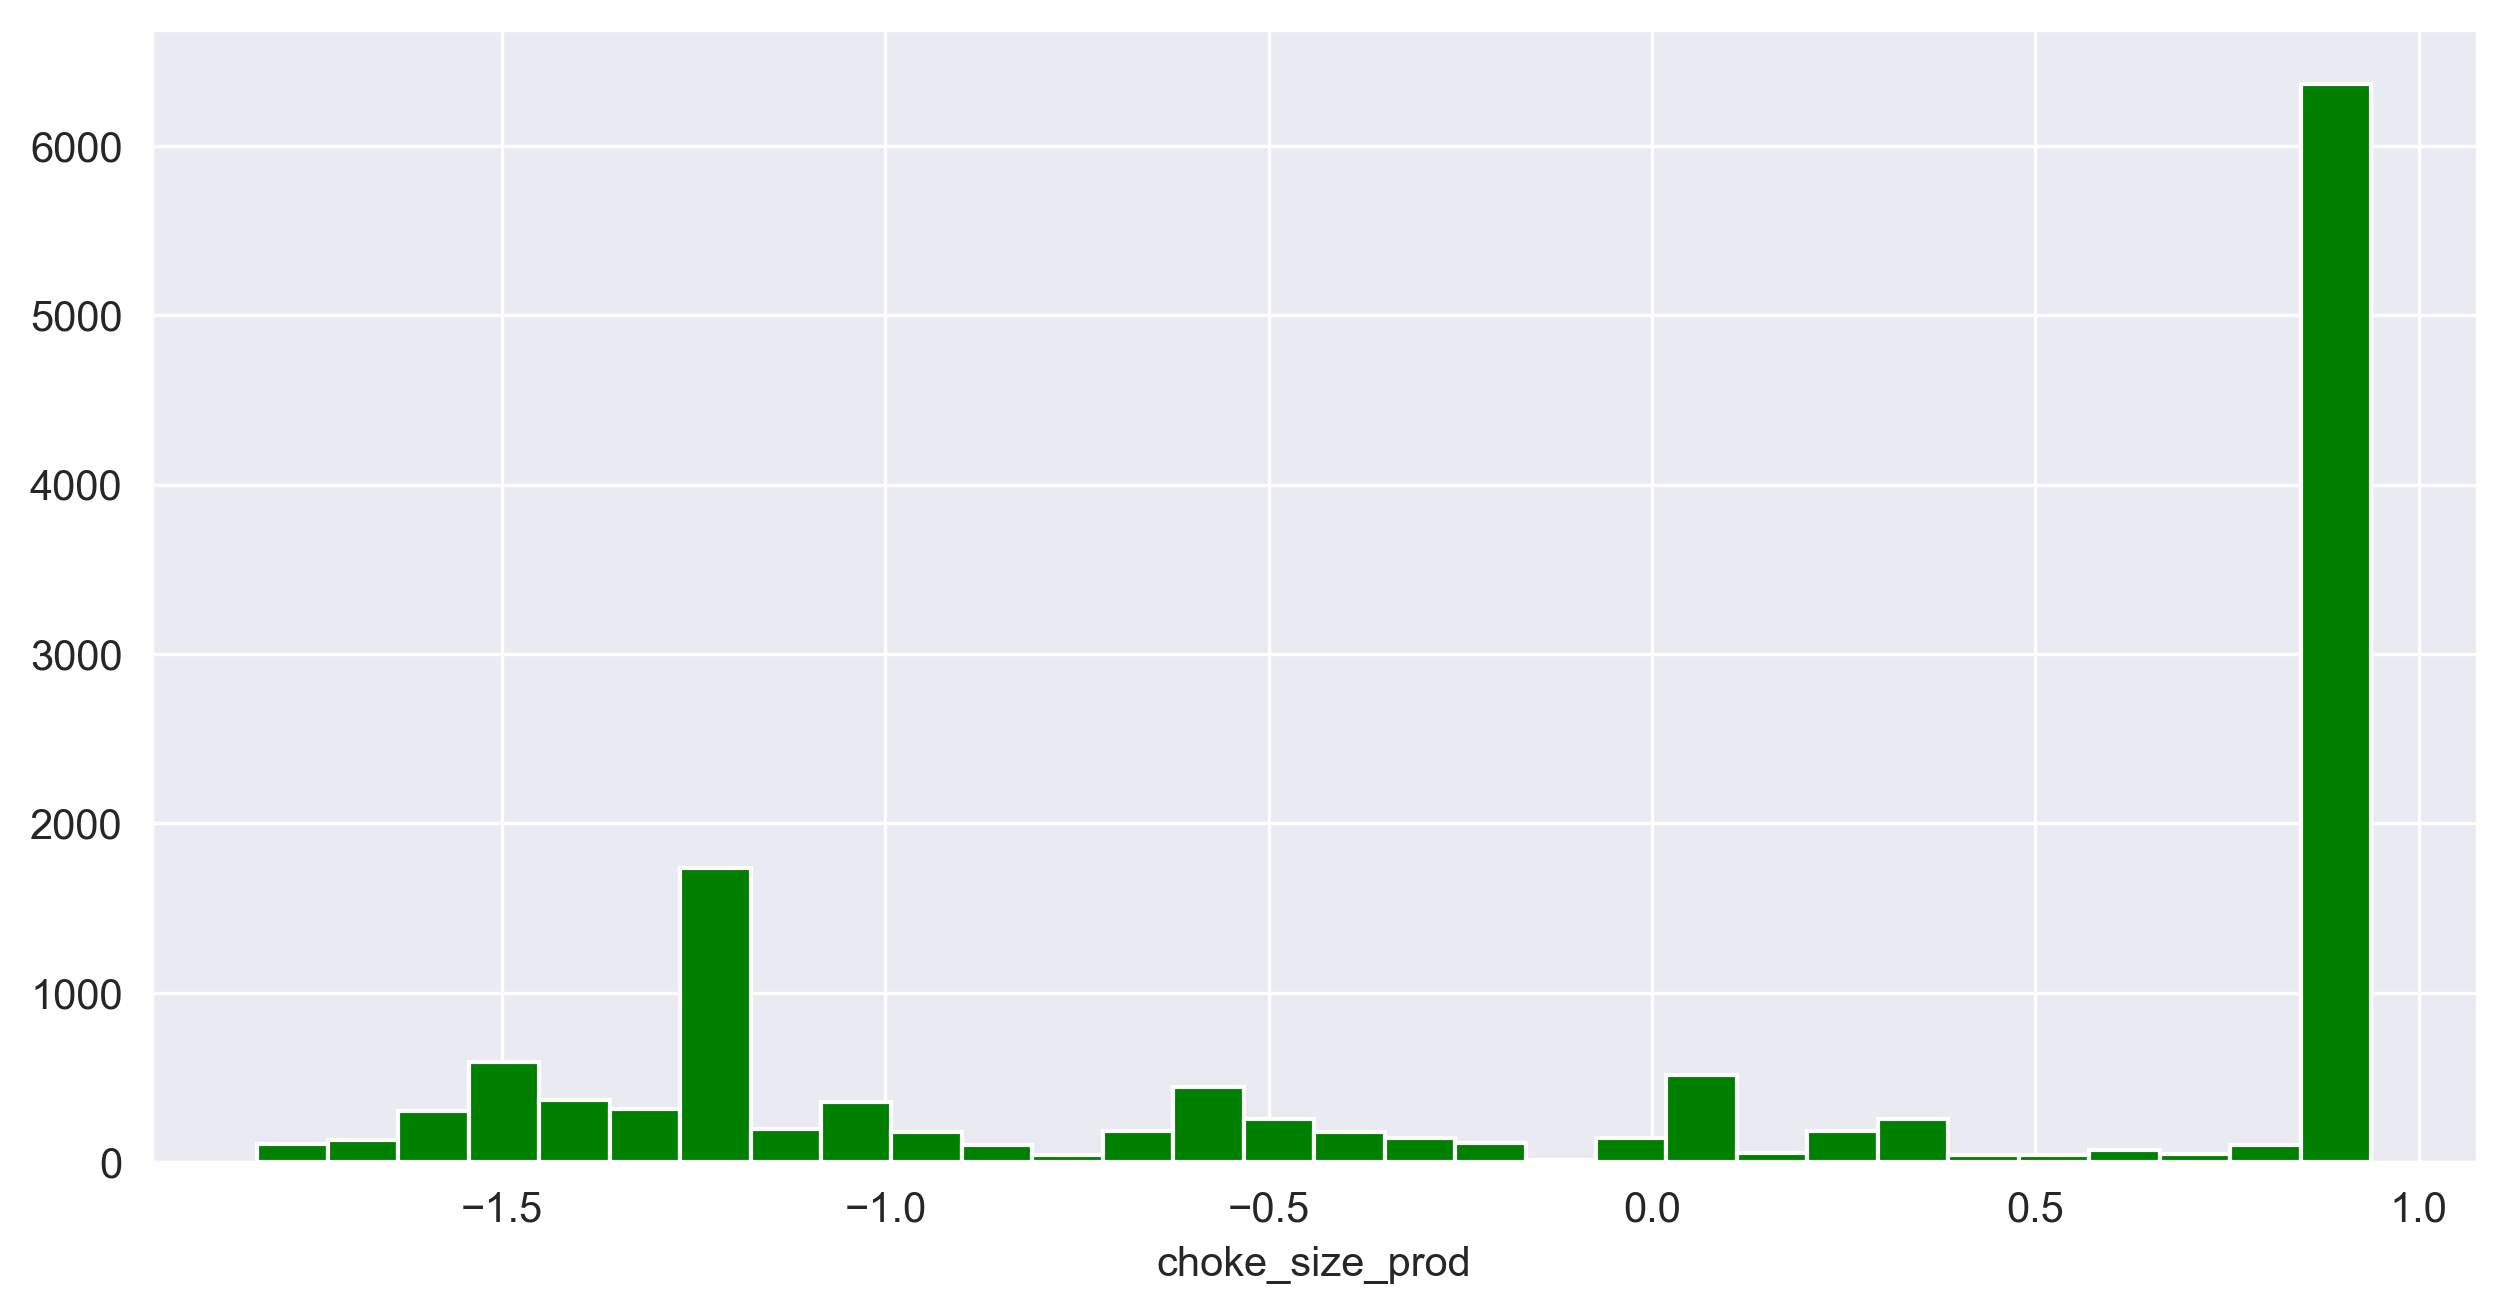

In [16]:
#continuing exploratory data  analysis
#findings; the choke was closed more than was open and would proberbly be the explanation behind the lack of correllation with gas produced
sns.set_style("darkgrid")
def histplot(data, x_label, bins):
    plt.figure(figsize=(10, 5));
    plt.hist(data=data, x= x_label, bins=bins, color = 'green')
    plt.xlabel(x_label);
    
histplot(gas_df, 'choke_size_prod', 30)

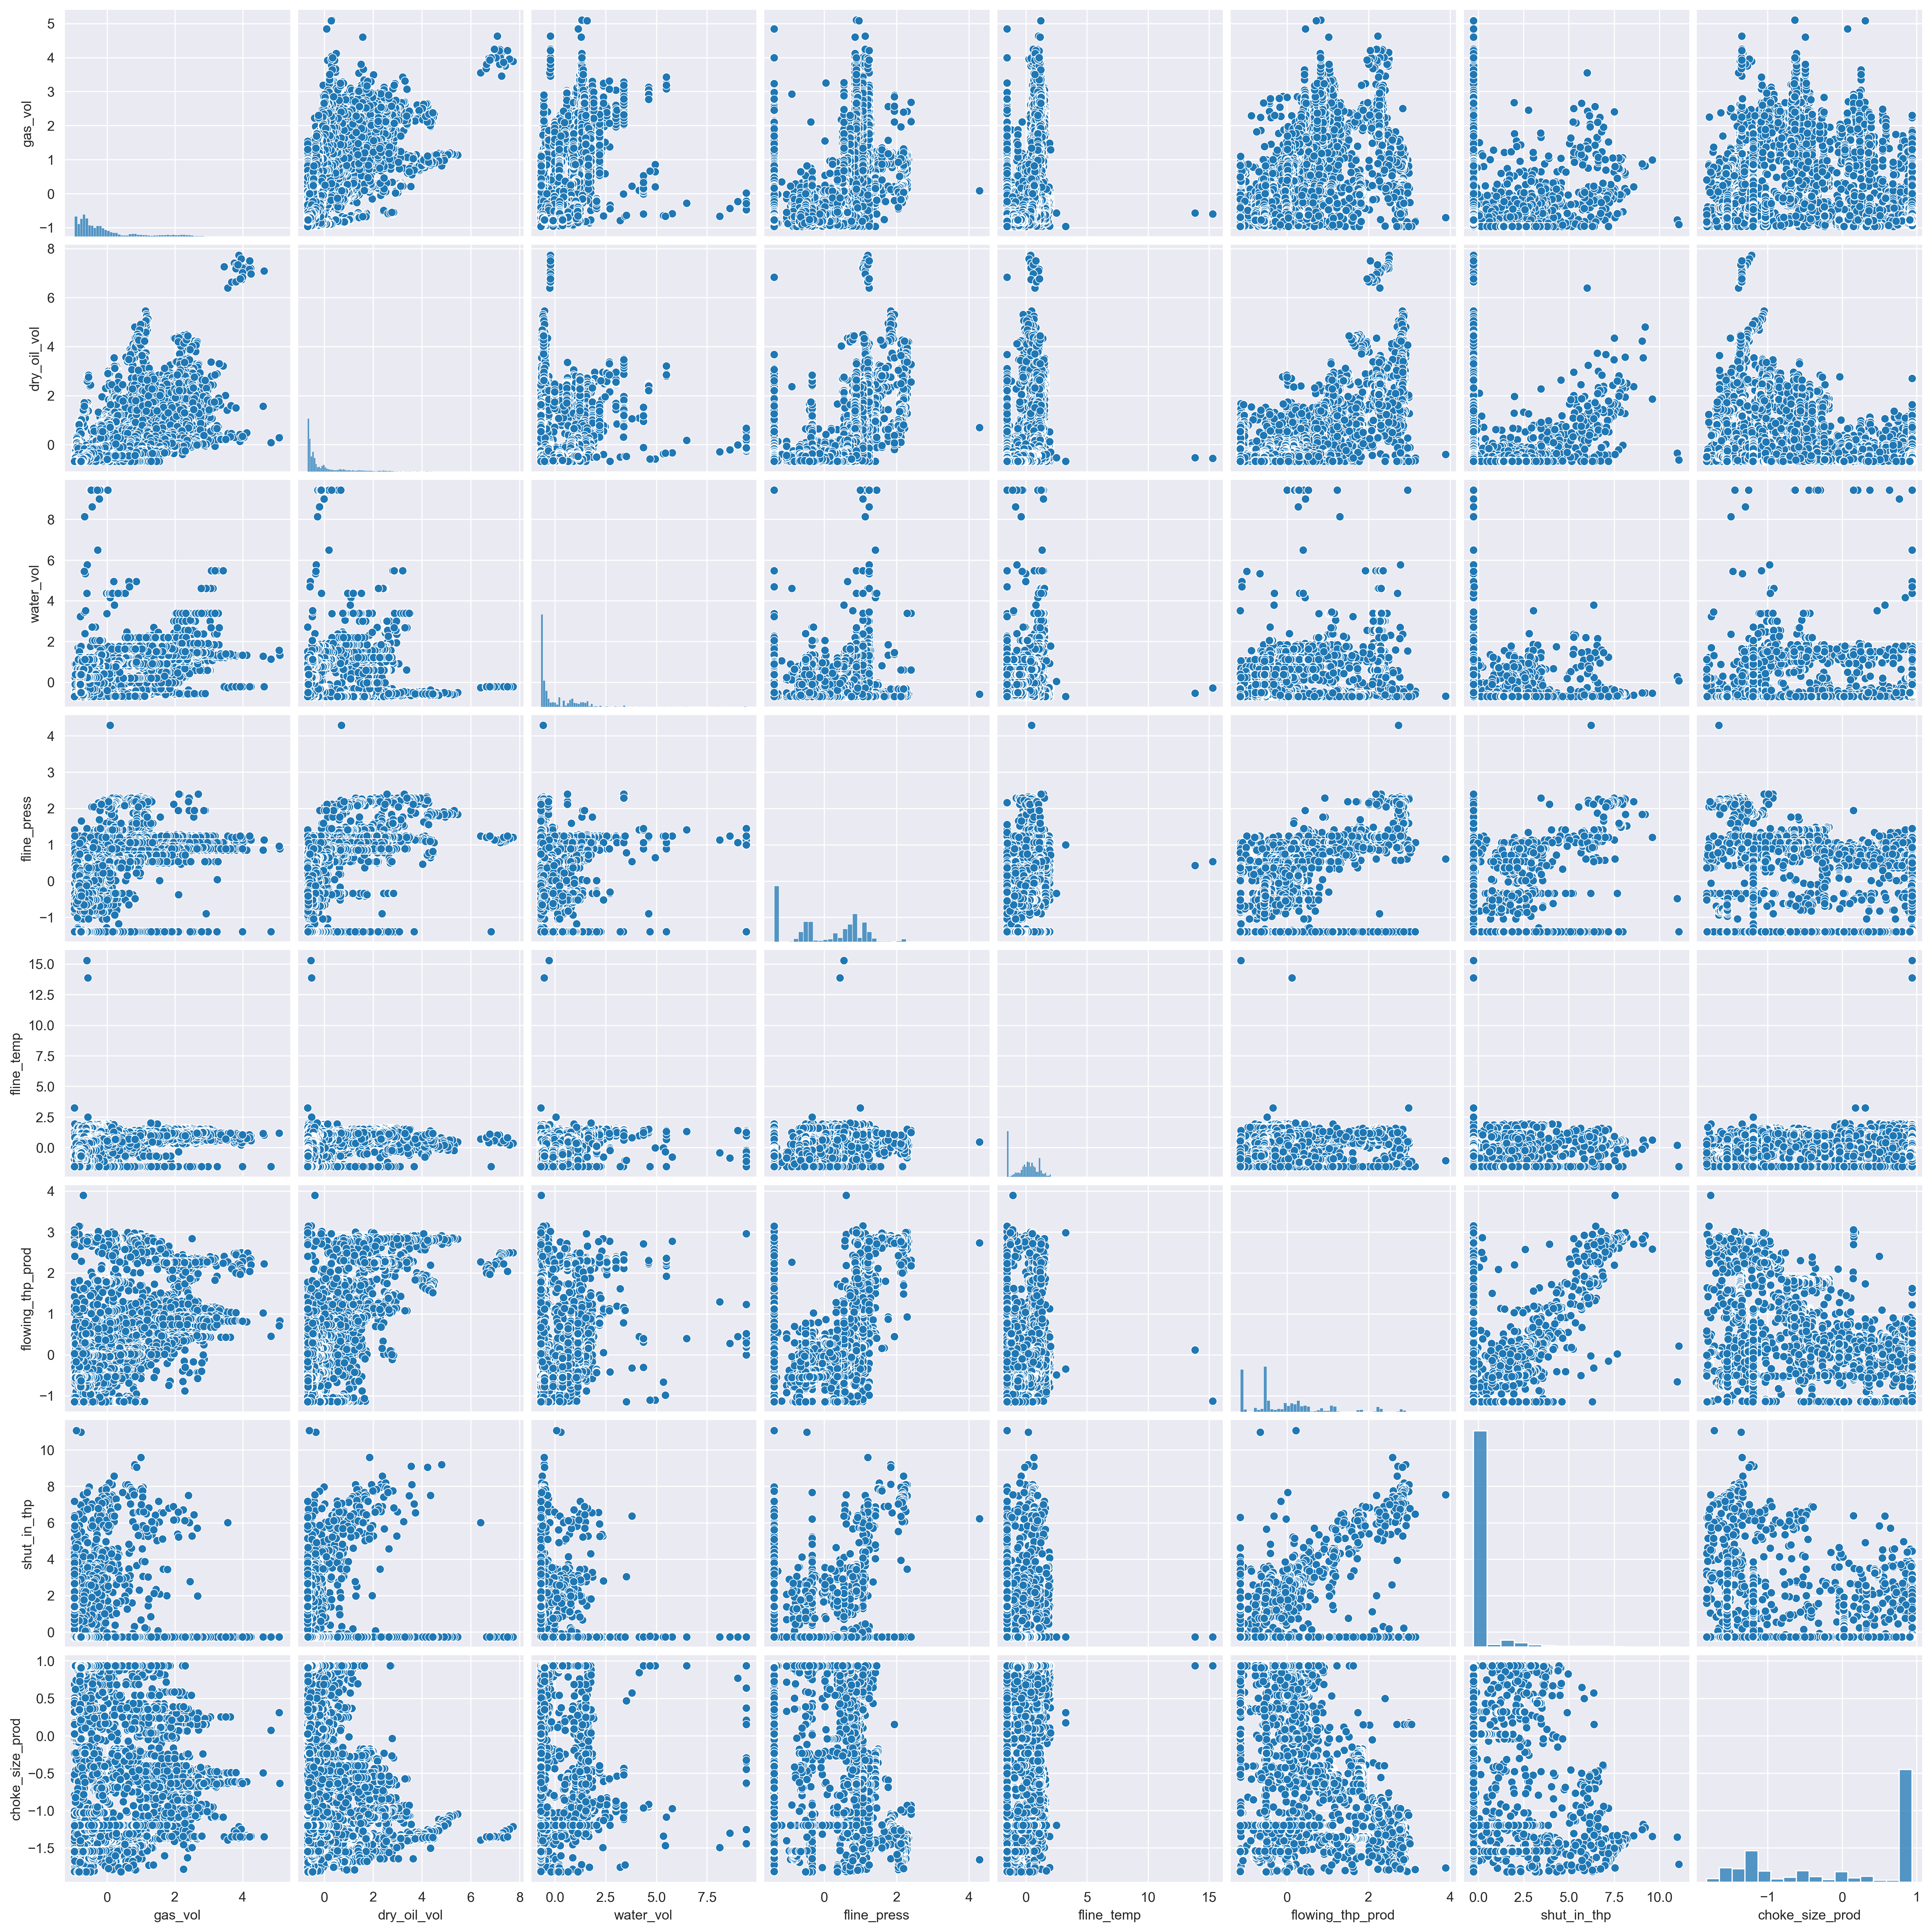

In [17]:
#Creating a pairplot for better data visualization
#sns.pairplot(gas_df, vars= ['dry_oil_vol ', 'water_vol', 'fline_press', 'fline_temp','flowing_thp_prod', 'shut_in_thp', 'choke_size_prod'], hue = 'gas_vol', palette ['copper', 'yellow', 'red']);

sns.pairplot(gas_df)

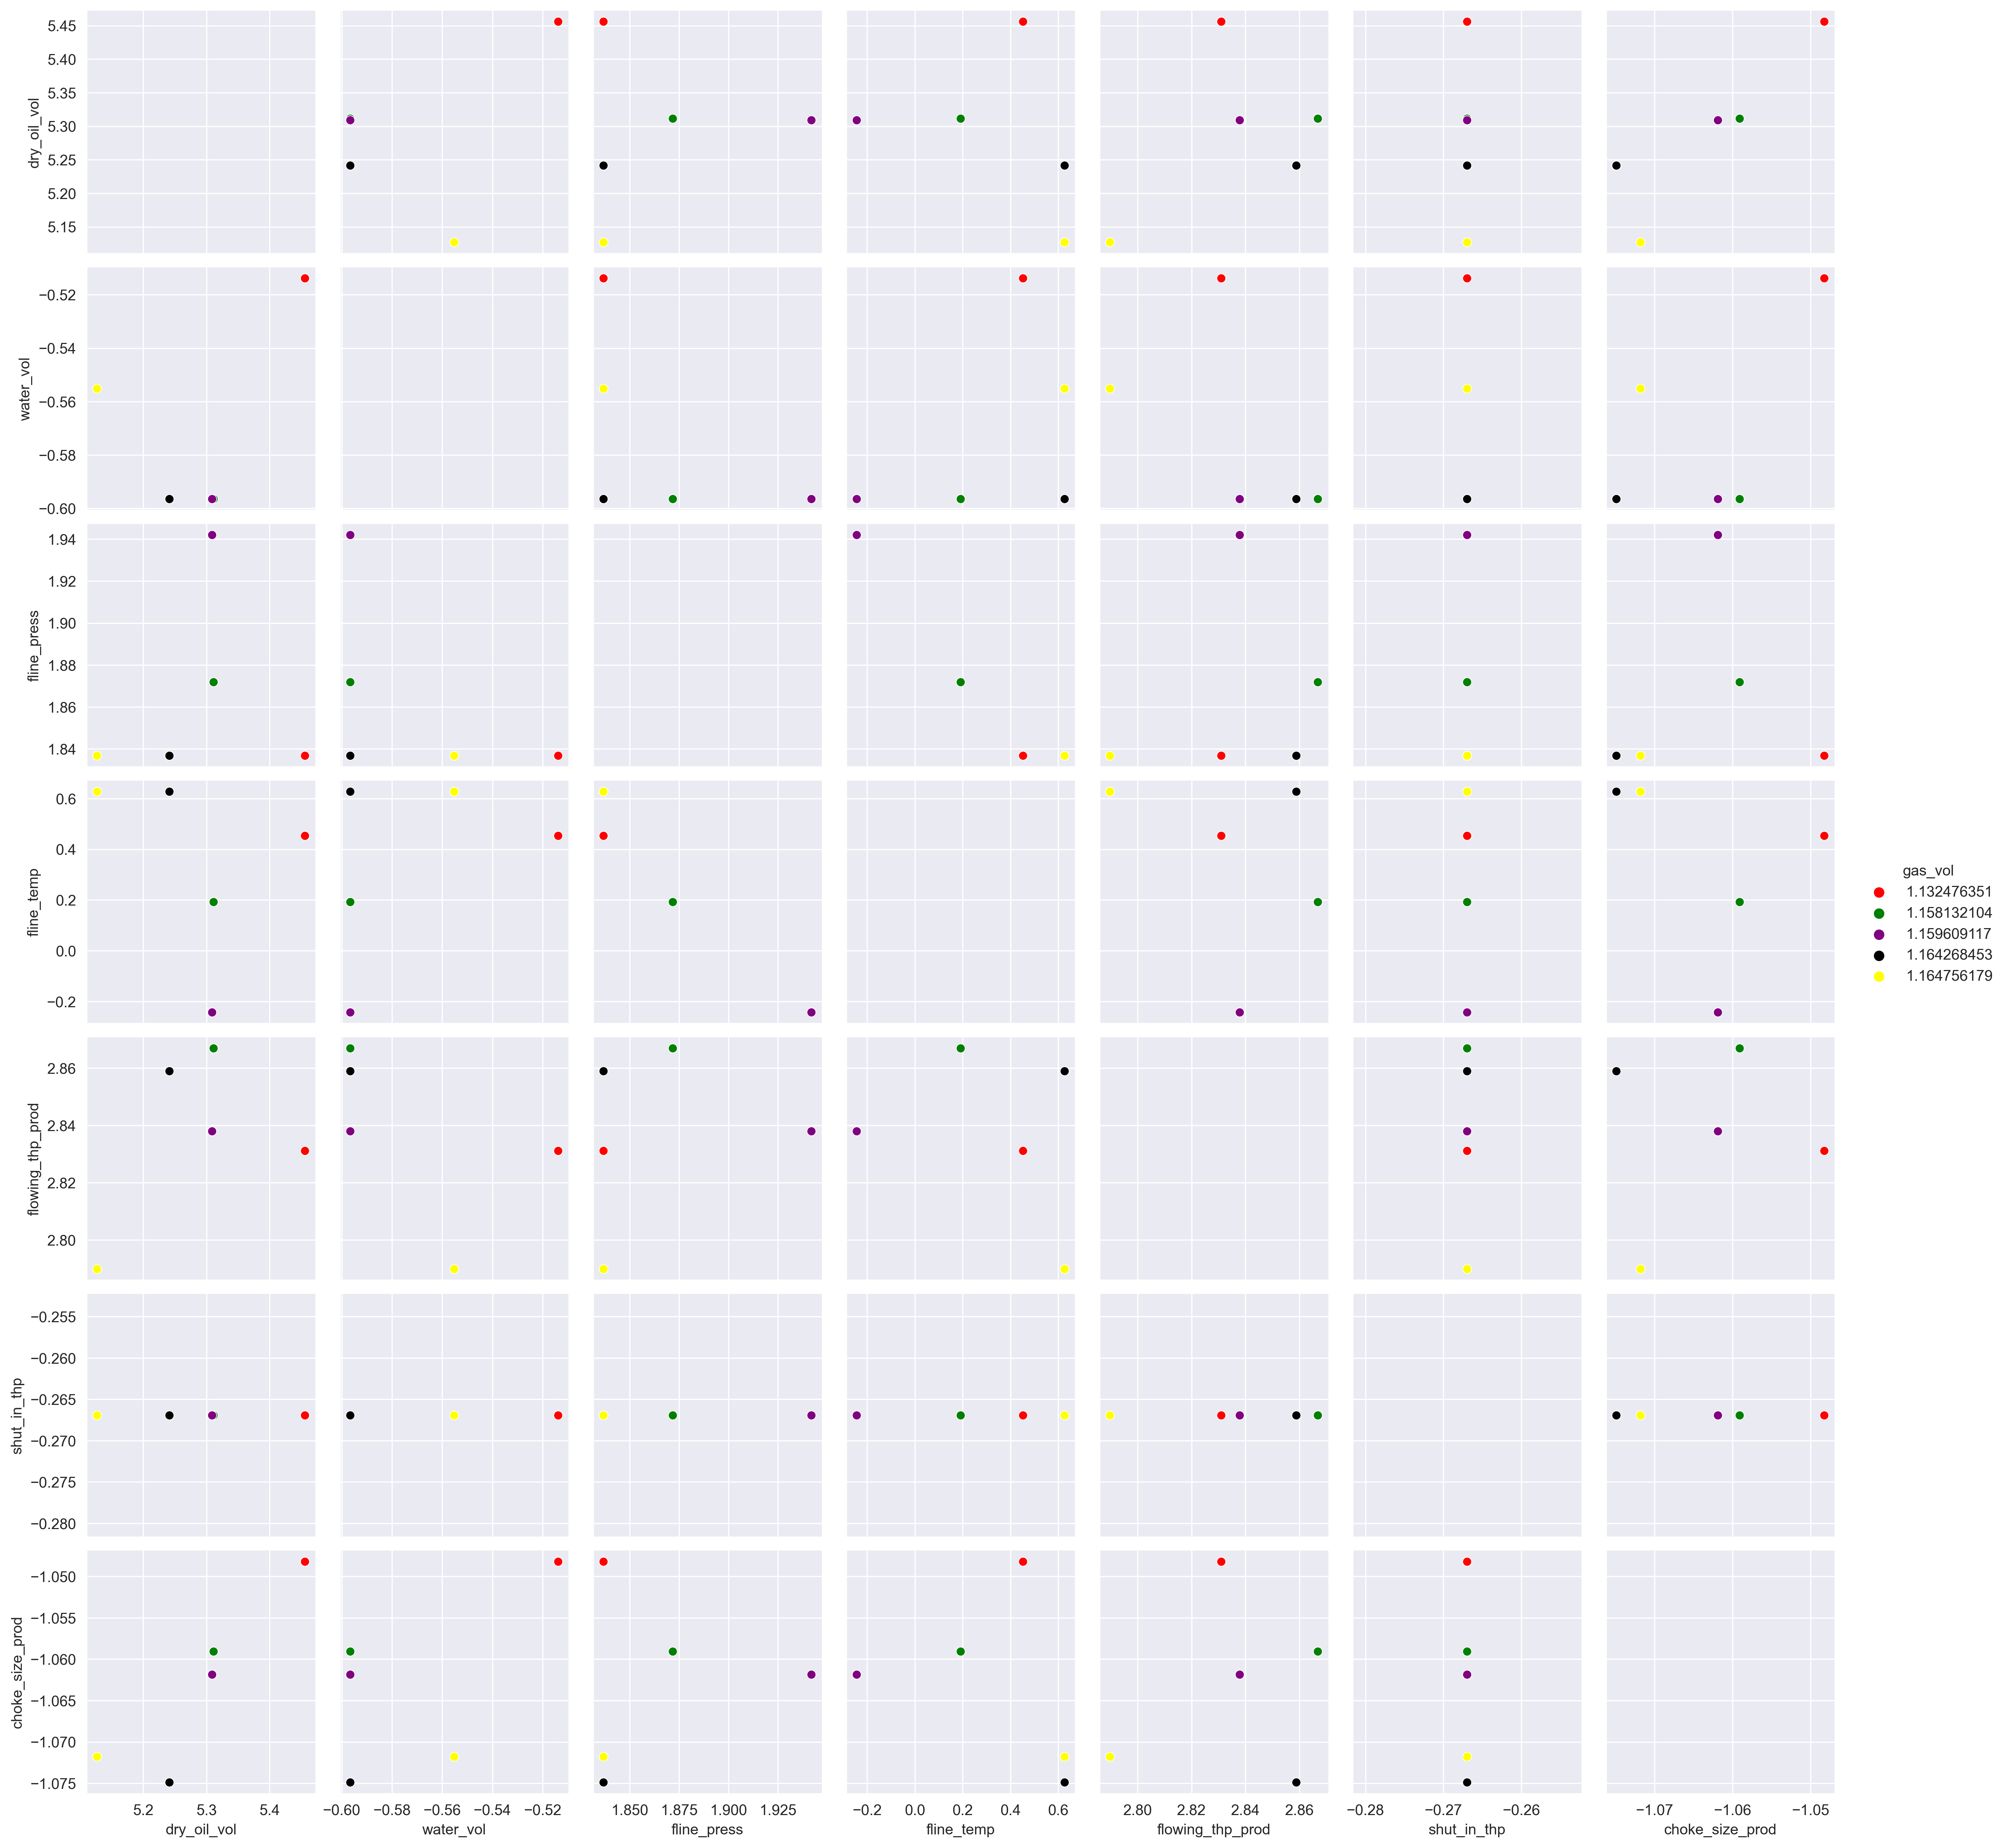

In [18]:
sns.pairplot(gas_df.head(), hue = 'gas_vol', palette= ['red', 'green', 'purple', 'black', 'yellow'] )

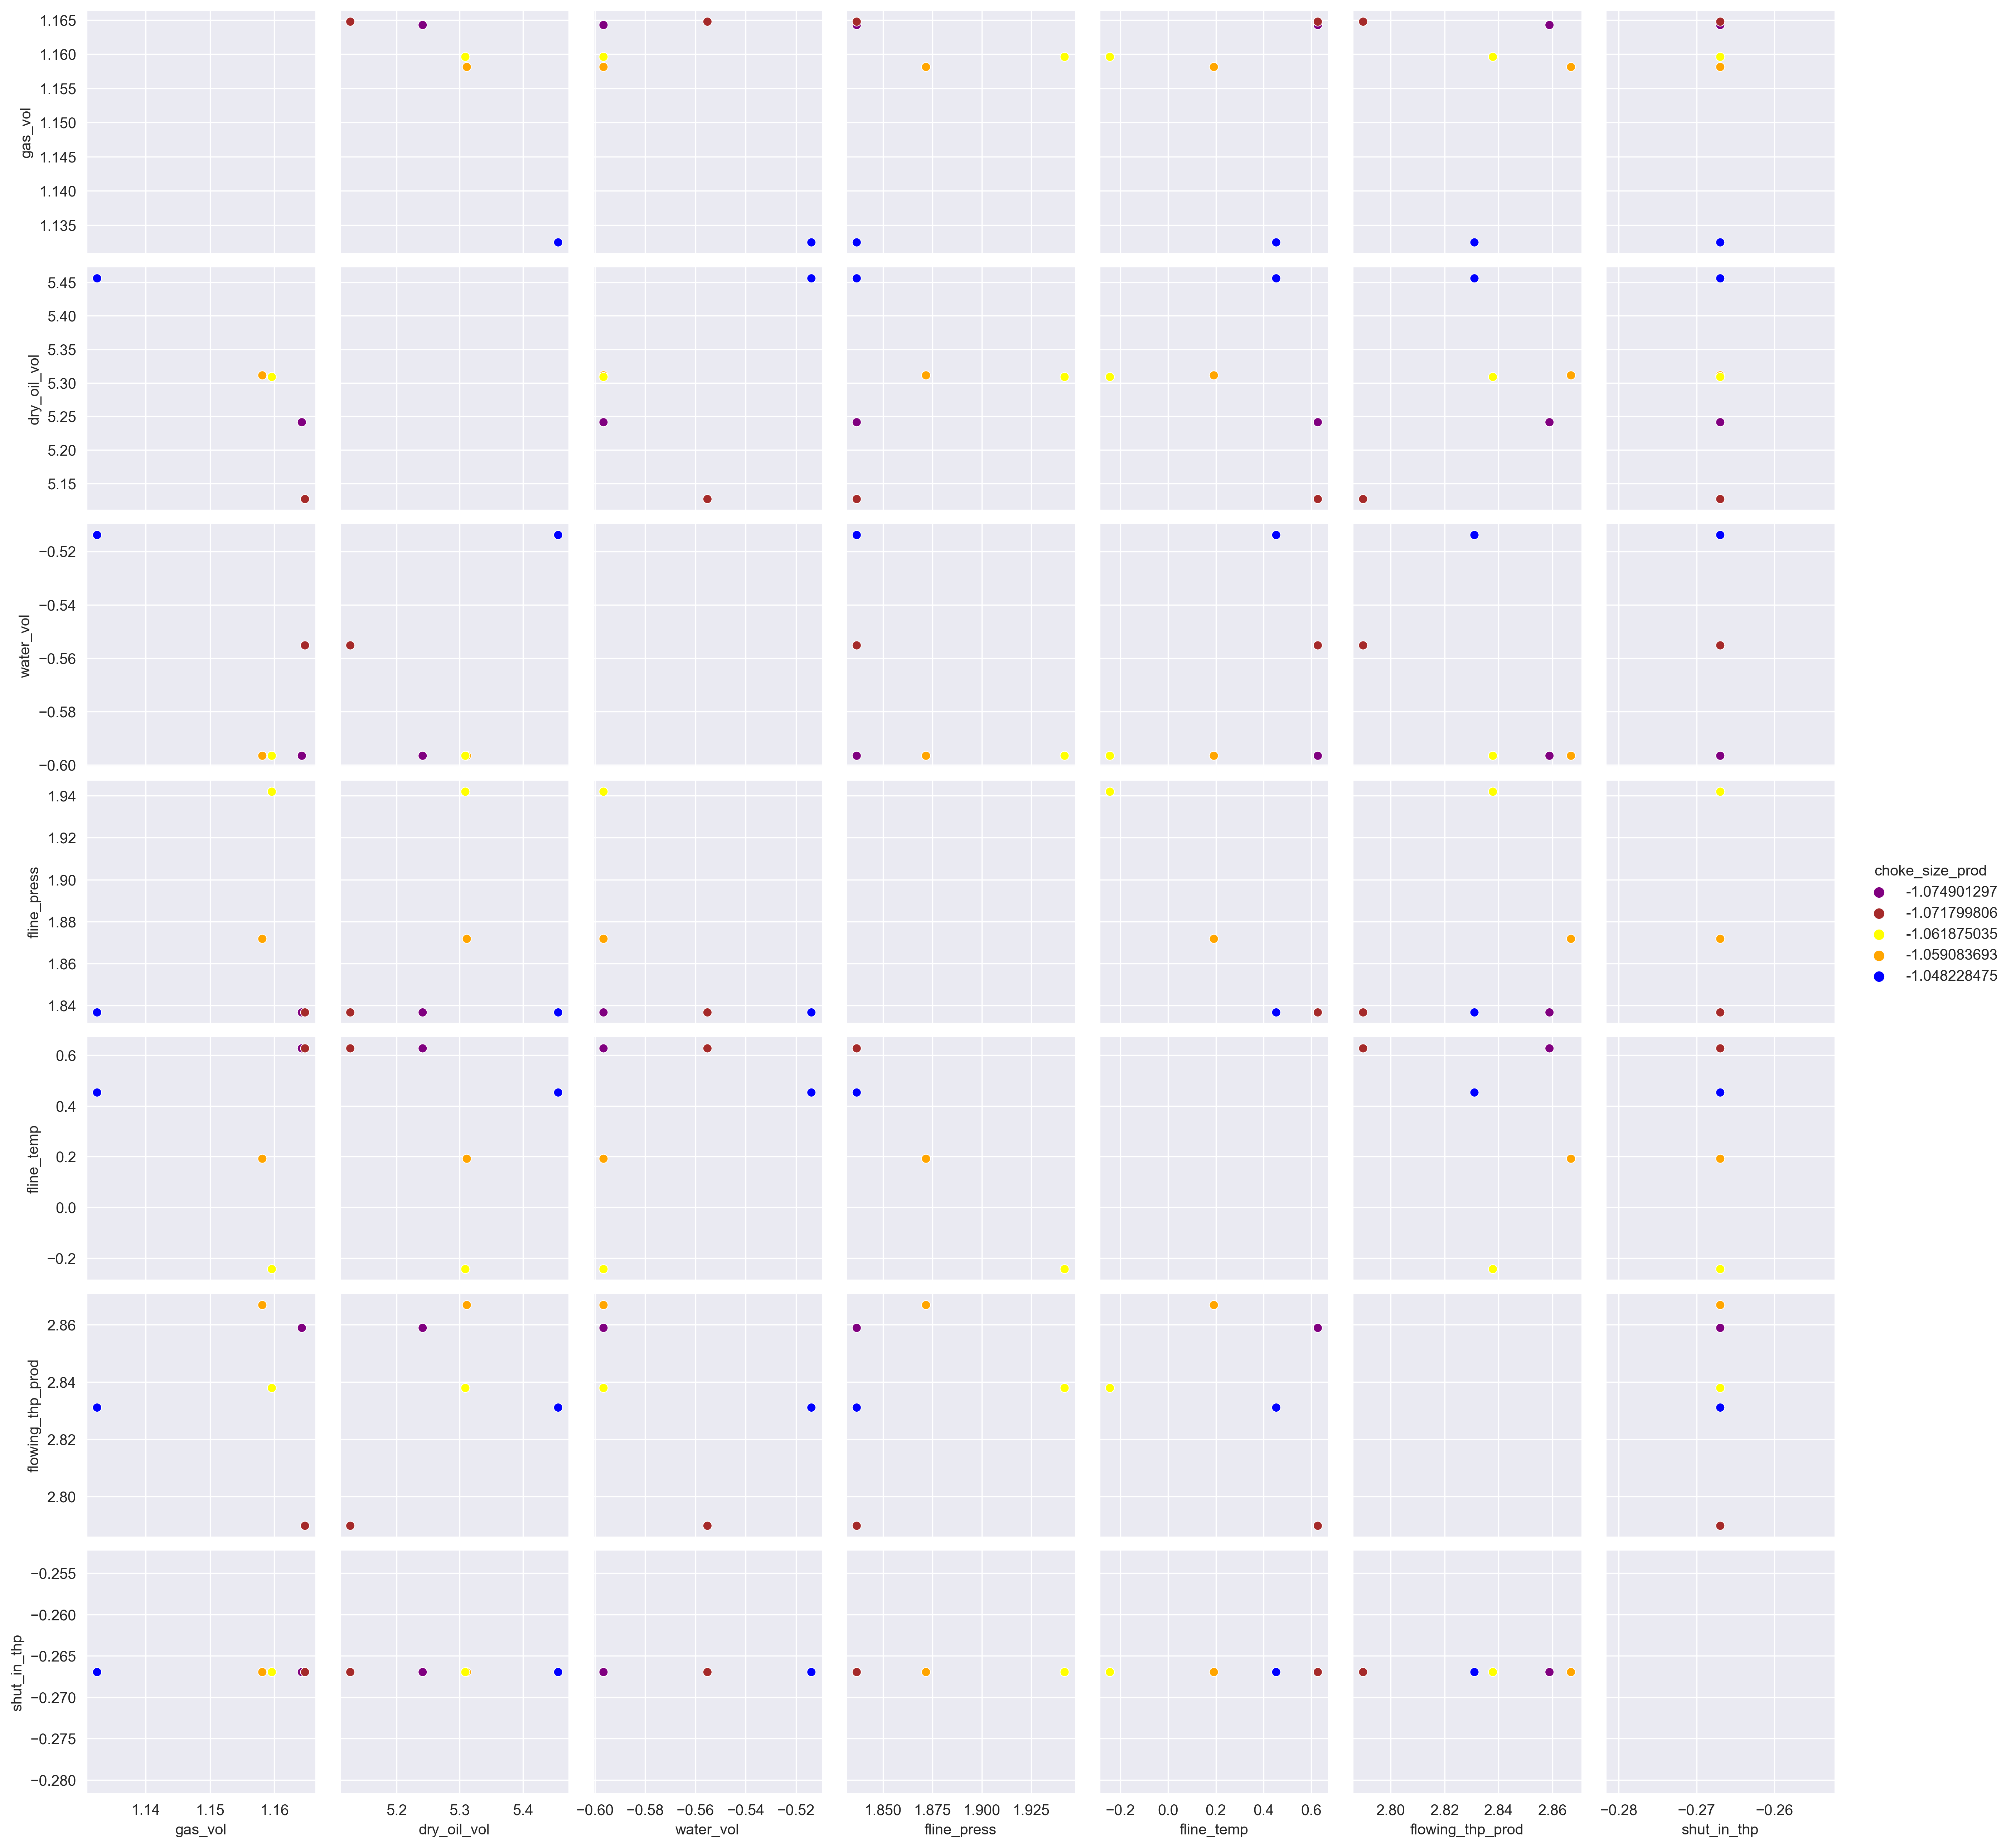

In [19]:
sns.pairplot(gas_df.head(), hue = 'choke_size_prod', palette = ['purple','brown','yellow','orange','blue'] )

# checking for outliers
#### +Understanding the outliers
#### +Is there any point to it
#### +Just another data visualisation technique that exposes percentile....?

<AxesSubplot:>

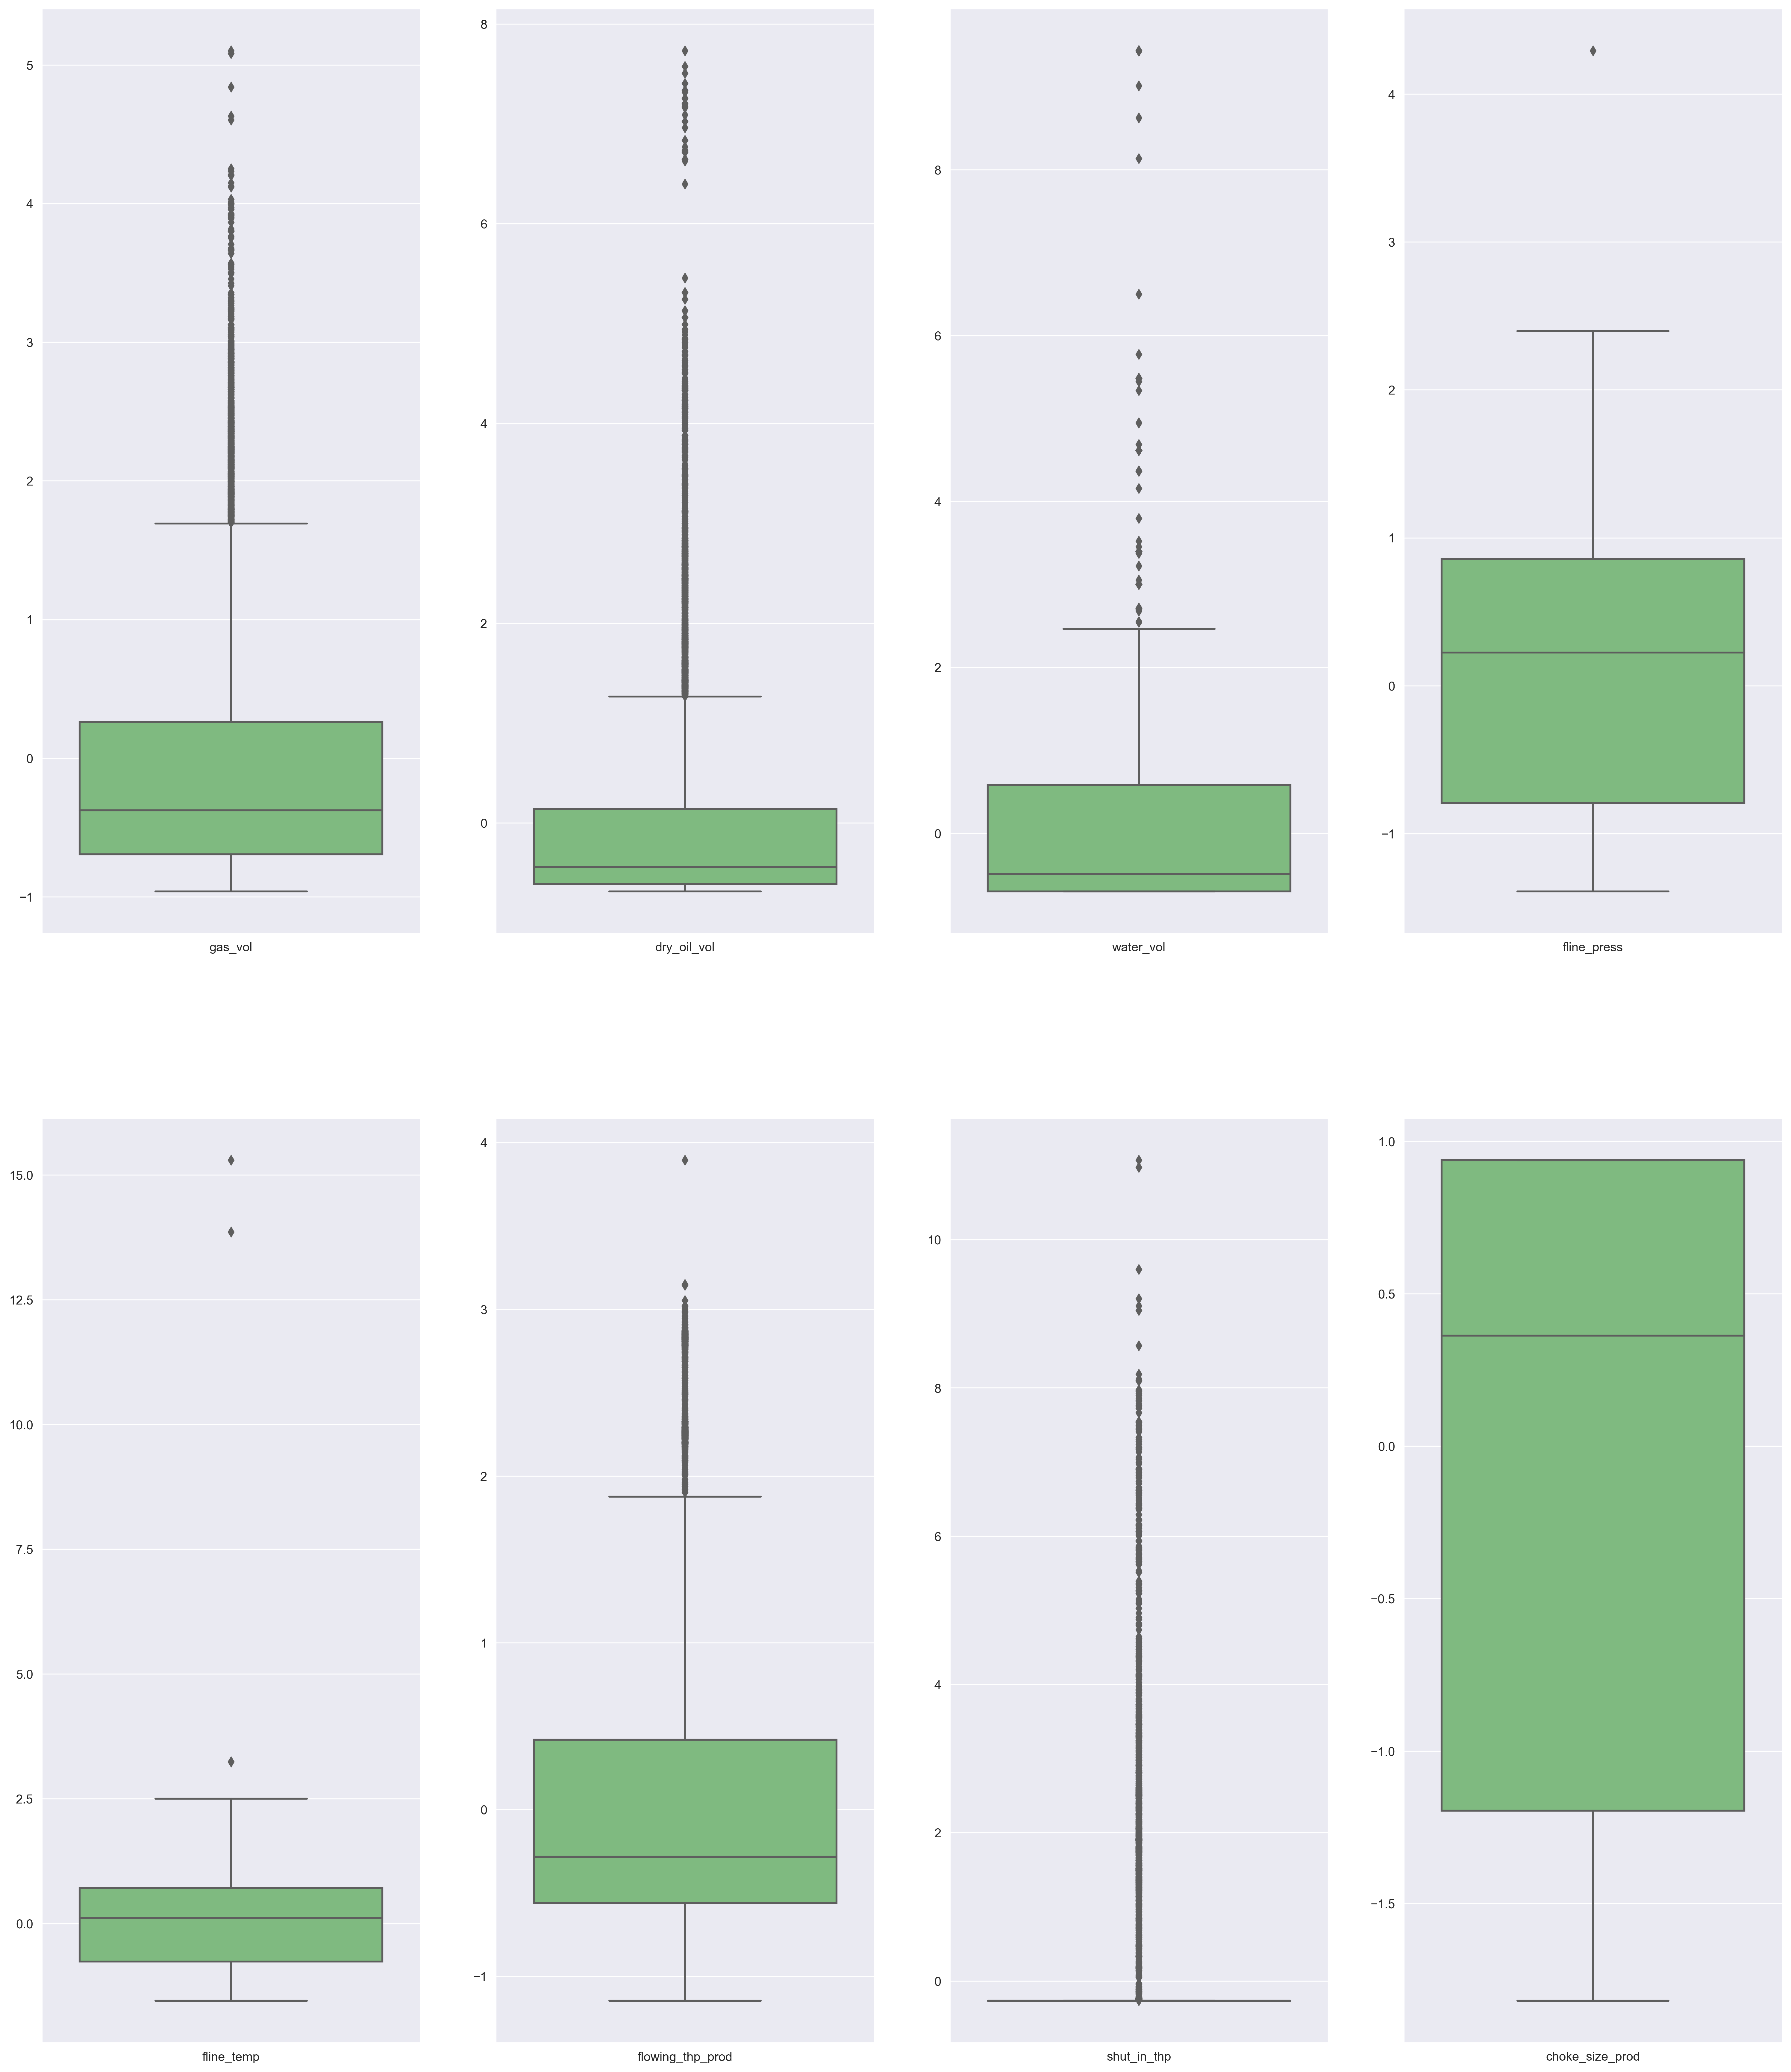

In [20]:
plt.figure(figsize=(25, 30))

plt.subplot(2, 4, 1)
sns.boxplot(data=gas_df[['gas_vol']], palette = 'Greens_r')

plt.subplot(2, 4, 2)
sns.boxplot(data= gas_df[['dry_oil_vol']], palette = 'Greens_r')

plt.subplot(2, 4, 3)
sns.boxplot(data= gas_df[['water_vol']], palette = 'Greens_r')

plt.subplot(2, 4, 4)
sns.boxplot(data=gas_df[['fline_press']], palette = 'Greens_r')

plt.subplot(2, 4, 5)
sns.boxplot(data=gas_df[['fline_temp']], palette = 'Greens_r')

plt.subplot(2, 4, 6)
sns.boxplot(data=gas_df[['flowing_thp_prod']], palette = 'Greens_r')

plt.subplot(2, 4, 7)
sns.boxplot(data= gas_df[['shut_in_thp']], palette = 'Greens_r')

plt.subplot(2, 4, 8)
sns.boxplot(data=gas_df[['choke_size_prod']], palette = 'Greens_r')

## modelling and training 


## RANDOM FOREST REGRESSION


In [21]:
#separating features and target variables
#features
x = gas_df[['dry_oil_vol', 'water_vol', 'fline_press', 'fline_temp','flowing_thp_prod', 'shut_in_thp', 'choke_size_prod']]
#target
y = gas_df['gas_vol']

In [22]:
#splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 28)

In [23]:
#fitting model into the training dataset
#10 decision trees
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Guassian classifier 
model = RandomForestRegressor(n_estimators = 10, random_state = 0)


#fitting the RF 
model.fit(x_train, y_train)

#prediction
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.9608818860933818

# Obtaining metrics

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R^2 on test data: {r2:.3f}")
print(f"MSE on test data: {mse:.3f}")
print(f"MAE on test data: {mae:.3f}")

R^2 on test data: 0.961
MSE on test data: 0.039
MAE on test data: 0.101


Correlation coefficient: 0.980


<function matplotlib.pyplot.show(close=None, block=None)>

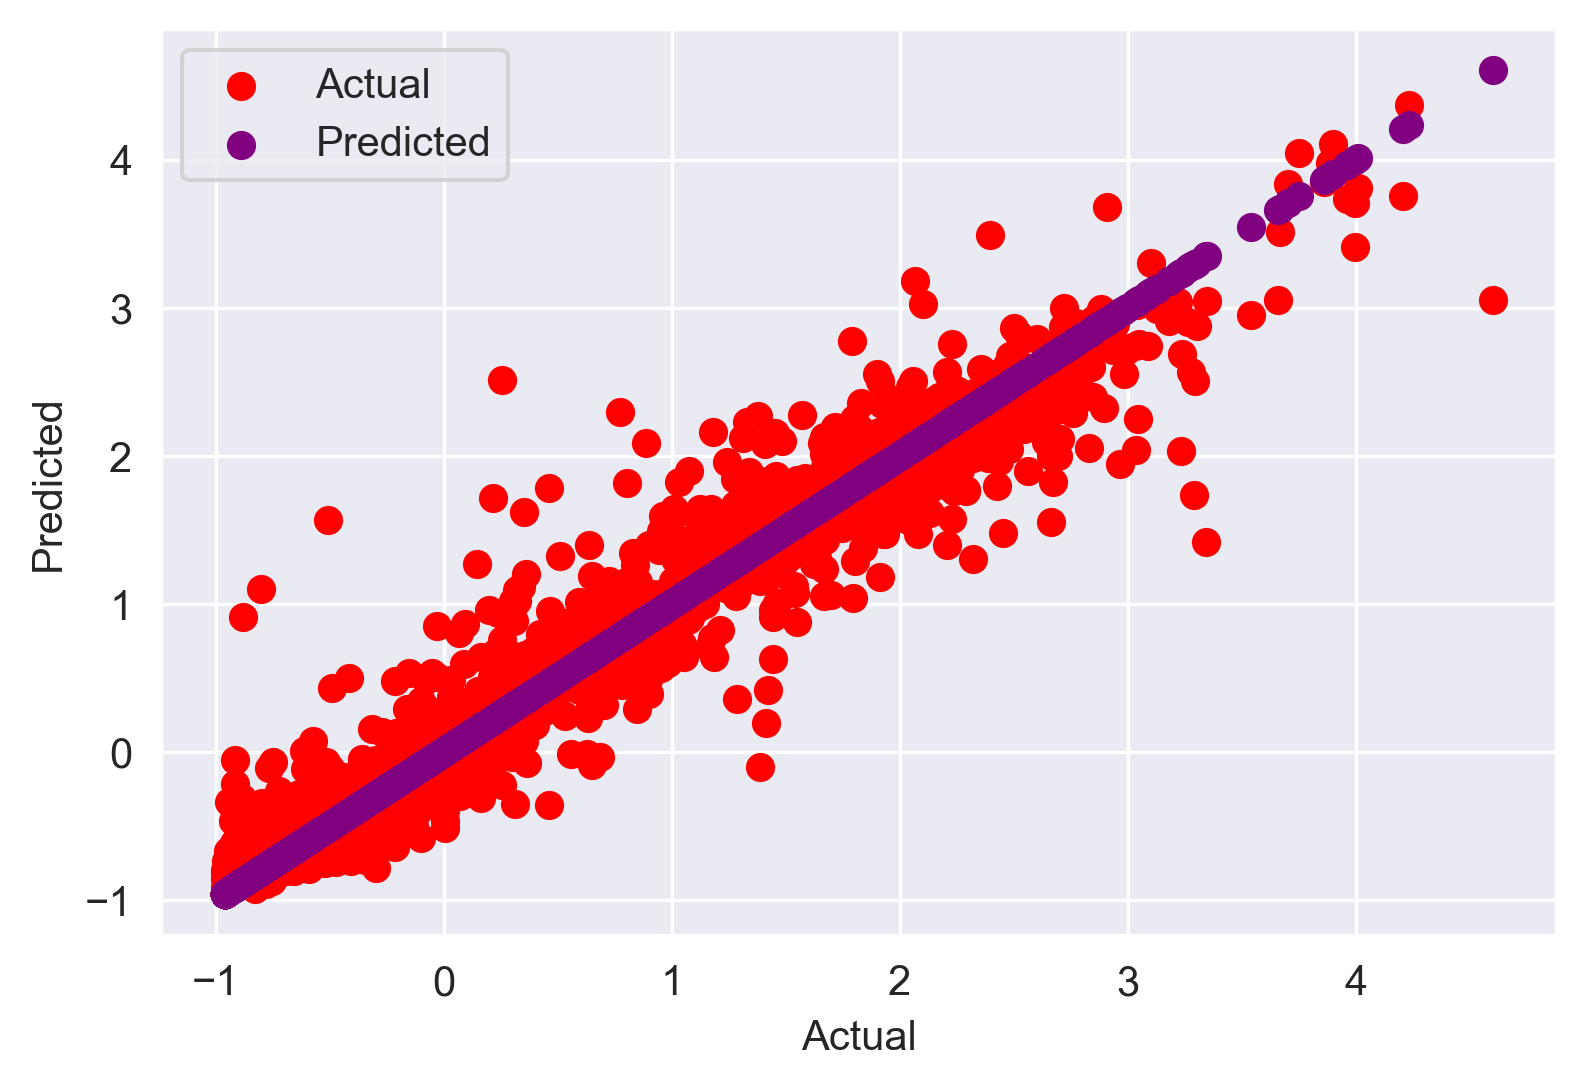

In [25]:
##cross validation
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

corr = np.corrcoef(y_test, y_pred)[0, 1]
print('Correlation coefficient: {:.3f}'.format(corr))

#scatter plot
plt.scatter(y_test, y_pred, color = 'red', label= 'Actual')
plt.scatter(y_test, y_test, color = 'purple', label= 'Predicted')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.legend()
plt.show

C:\Users\Alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


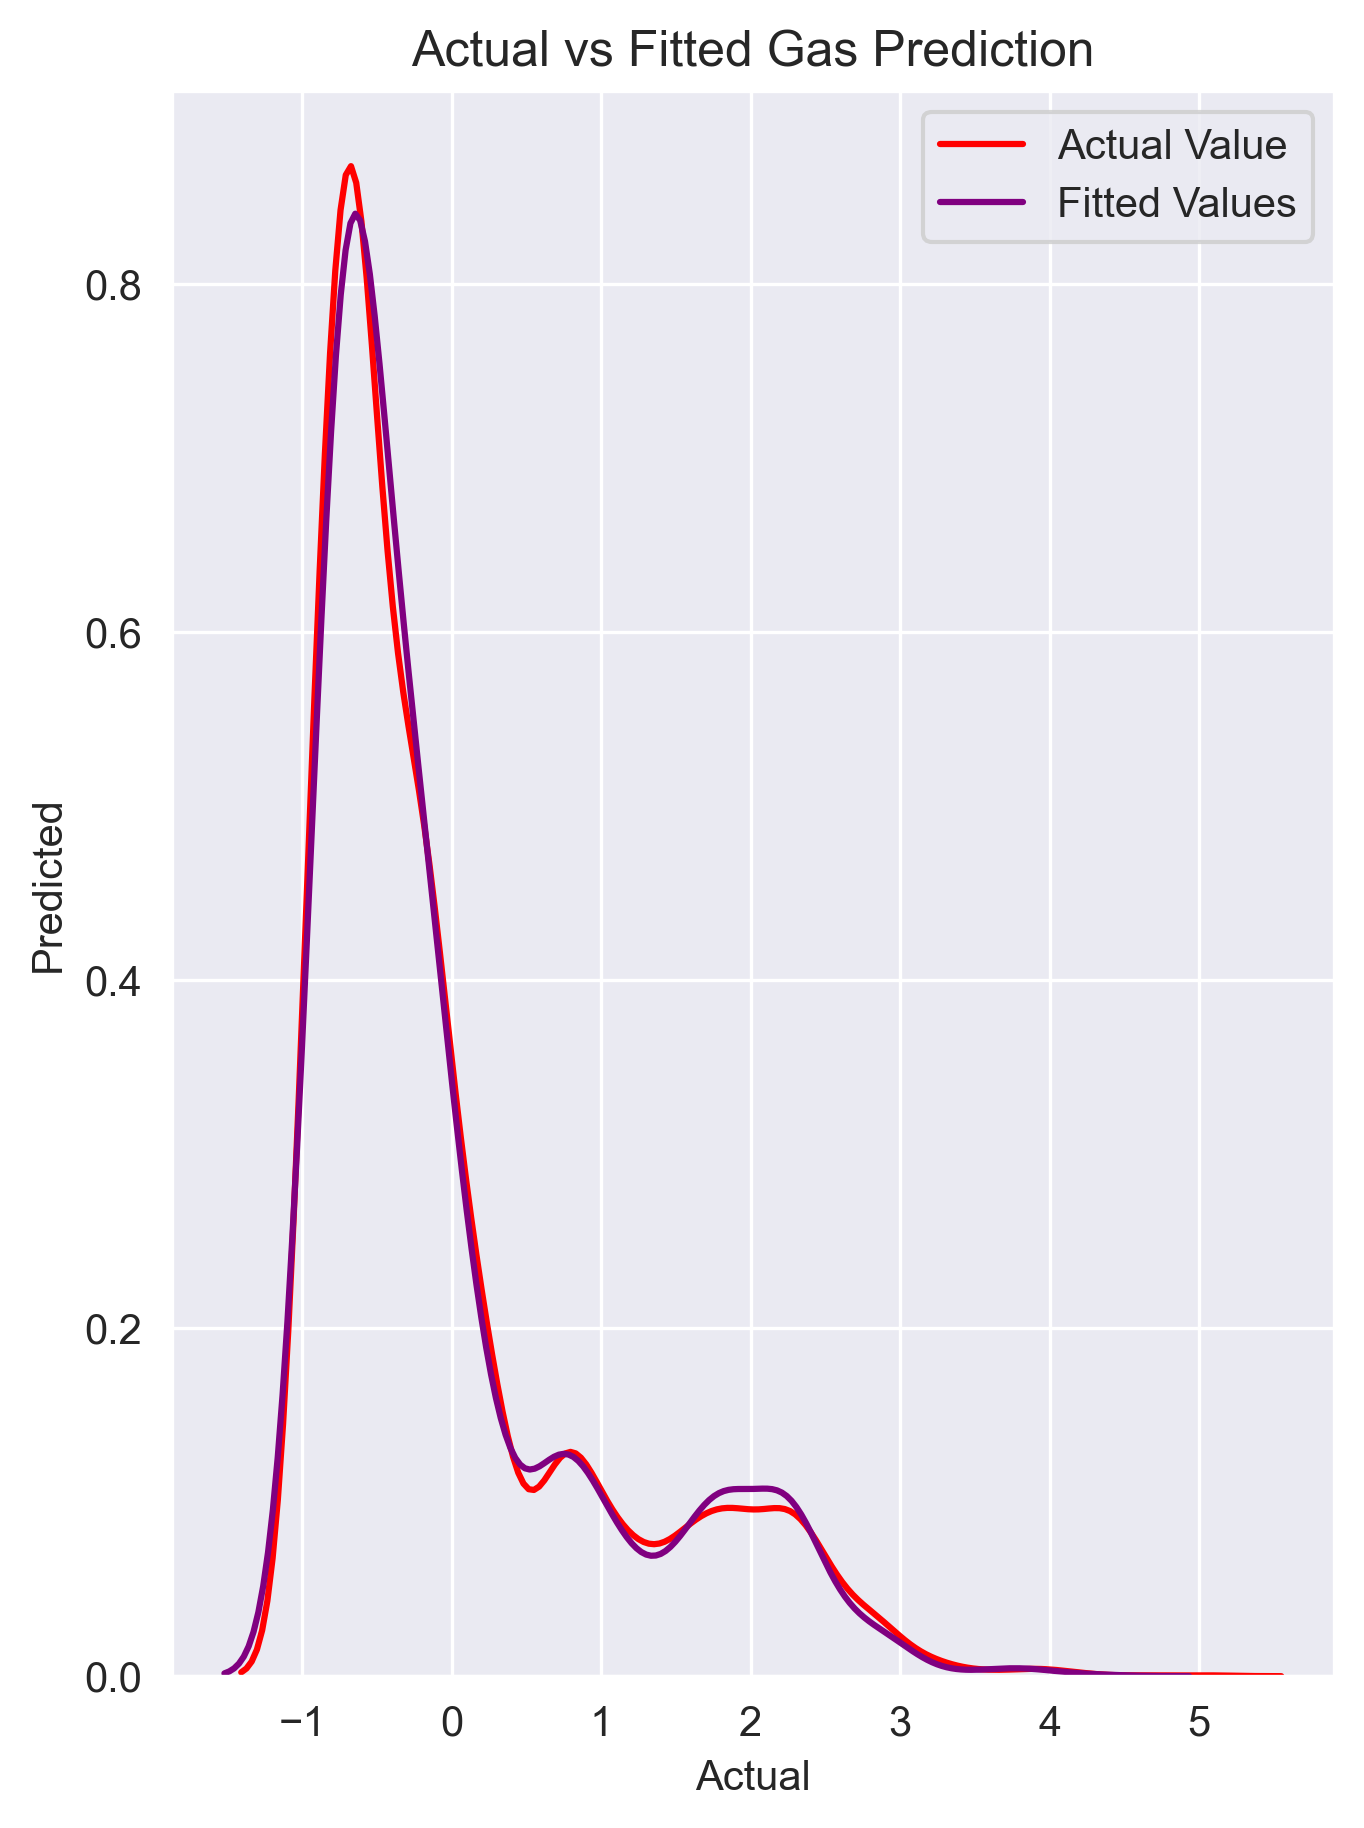

In [26]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="red", label= "Actual Value")
sns.distplot(y_pred, hist=False, color="purple", label= "Fitted Values", ax=ax)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Fitted Gas Prediction')

plt.legend()
plt.show()
plt.close()

In [27]:
# regressor is a trained RandomForestRegressor object

# Save the model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

NameError: name 'pickle' is not defined

### Feature Importance 


In [ ]:
importances = model.feature_importances_
print(importances)

In [ ]:
#sort the importances in descending order 
sorted_importances= np.argsort(importances)[::-1]
print(sorted_importances)

In [ ]:
#get the name of the features

feature_names = x_train.columns


#creating the barplot for feature importance

plt.barh(range(len(sorted_importances)), importances[sorted_importances], align = 'center')
plt.yticks(range(len(sorted_importances)), [feature_names[i] for i in sorted_importances])

plt.xlabel('Level of Importance')
plt.ylabel('Features for Prediction')
plt.title('Feature Importance for Gas production forecasting using ANN')
plt.show()

# Feature Importance In Percentages

In [ ]:
#Calculate the sum of all features 
importance_sum = np.sum(importances)

#Convert them to percentages
importances_percentage = 100 * importances / importance_sum

#sorting in descending order

sorted_importances = np.argsort(importances_percentage)[::-1]

feature_names = x_train.columns

#plots 

plt.barh(range(len(sorted_importances)), importances_percentage[sorted_importances], align = 'center', color = 'green')
plt.yticks(range(len(sorted_importances)), [feature_names[i] for i in sorted_importances])

plt.xlabel('Level of Importance (%)')
plt.ylabel('Features for Prediction')
plt.title('Feature Importance for Gas production forecasting using ANN', fontsize = 20)
plt.show()


## Regenerating Data from results of feature importance 




In [ ]:
new_data = gas_df.drop(['shut_in_thp', 'fline_temp'], axis=1)
new_data

In [ ]:
#Saving new data as csv for further training 

new_data.to_csv('Retrain_data.csv')

### Attempt at getting correlation plot 


In [ ]:
plt.scatter(x_test[['dry_oil_vol', 'water_vol', 'fline_press', 'fline_temp','flowing_thp_prod', 'shut_in_thp', 'choke_size_prod']].values, y_test, color= 'red')
plt.scatter(x_test[['dry_oil_vol', 'water_vol', 'fline_press', 'fline_temp','flowing_thp_prod', 'shut_in_thp', 'choke_size_prod']].values, y_pred, color= 'purple')
plt.title('Corellation Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show

# Retraining with Random Forest II

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x = new_data[['dry_oil_vol', 'water_vol', 'fline_press', 'flowing_thp_prod', 'choke_size_prod' ]]
y = new_data['gas_vol']

#retrain

model = RandomForestRegressor(n_estimators= 10, max_depth= 10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

model.score(x_test, y_test)

In [ ]:
x = new_data[['dry_oil_vol', 'water_vol', 'fline_press', 'flowing_thp_prod', 'choke_size_prod' ]]
y = new_data['gas_vol']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 28)

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Guassian classifier 
model = RandomForestRegressor(n_estimators = 10, random_state = 0)


#fitting the RF 
model.fit(x_train, y_train)

#prediction
y_pred = model.predict(x_test)
model.score(x_test, y_test)